In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('athlete_events.csv')
noc = pd.read_csv('noc_regions.csv')

In [3]:
data = pd.merge(df,noc,how='left',on='NOC')

In [4]:
summer = data.loc[data['Season']=='Summer']
summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [5]:
summer['Medal'].fillna('DNW', inplace = True)
summer = summer.drop_duplicates()

D:\CSE 3rd year\anaconda\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [6]:
summer.loc[summer['region'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
578,SGP,Singapore
6267,ROT,Refugee Olympic Athletes
44376,SGP,June Climene
61080,UNK,Unknown
64674,TUV,Tuvalu
80986,SGP,Rika II
108582,SGP,Singapore-2
235895,SGP,Singapore-1


In [7]:
summer.drop(['notes','Team'], axis = 1 , inplace = True)
summer.rename(columns = {'region':'Country'}, inplace = True)

In [8]:
summer[['Year','City']].drop_duplicates().sort_values('Year')

,Year,City
3079,1896,Athina
3,1900,Paris
711,1904,St. Louis
268,1906,Athina
1149,1908,London
35,1912,Stockholm
2,1920,Antwerpen
39,1924,Paris
133,1928,Amsterdam
26,1932,Los Angeles


In [9]:
country_dict = {'Athina':'Greece',
                'Paris':'France',
                'St. Louis':'USA',
                'London':'UK',
                'Stockholm':"Sweden",
                'Antwerpen':'Belgium',
                'Amsterdam':'Netherlands',
                'Los Angeles':'USA',
               'Berlin':'Germany',
                'Helsinki':'Finland',
                'Melbourne':'Australia',
                'Roma':'Italy',
                'Tokyo':'Japan',
                'Mexico City':'Mexico',
                'Munich':'Germany',
                'Montreal':'Canada',
                'Moskva':'Russia',
                'Seoul':'South Korea',
               'Barcelona':'Spain',
               'Atlanta':'USA',
               'Sydney':'Australia',
               'Beijing':'China',
               'Rio de Janeiro':'Brazil'}

In [10]:
summer['Host_Country']=summer['City'].map(country_dict)
summer.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Host_Country
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,Spain
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,UK
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,Belgium
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,France
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,DNW,Netherlands,USA


In [11]:
medals = summer.loc[summer['Medal']!='DNW']
medals.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Host_Country
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,France
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,Belgium
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,Belgium
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,UK
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,UK


In [12]:
gdp = pd.read_excel('world_gdp.xls',skiprows=3)

In [13]:
gdp = gdp[['Country Name','1988', '1992', '1996', '2000', '2004','2008','2012', '2016']]
gdp.rename(columns={'Country Name':'Country'},inplace=True)

In [14]:
gdp = pd.melt(gdp, 
            id_vars='Country', 
            value_vars=list(gdp.columns[1:]), 
            var_name='Year', 
            value_name='GDP')
gdp.sort_values(['Country','Year'],ascending = [True,True],inplace=True)
gdp.head()

,Country,Year,GDP
1,Afghanistan,1988,NaN
265,Afghanistan,1992,NaN
529,Afghanistan,1996,NaN
793,Afghanistan,2000,NaN
1057,Afghanistan,2004,5.285466e+09


In [15]:
to_replace = ['Bahamas, The','Egypt, Arab Rep.','Iran, Islamic Rep.',"Cote d'Ivoire",'Kyrgyz Republic','North Macedonia',
             'Korea, Dem. People’s Rep.','Russian Federation','Slovak Republic','Korea, Rep.','Syrian Arab Republic',
              'Trinidad and Tobago','United Kingdom','United States','Venezuela, RB','Virgin Islands (U.S.)']
            

new_countries =   ['Bahamas','Egypt', 'Iran', 'Ivory Coast','Kyrgyzstan','Macedonia','North Korea','Russia','Slovakia',
                   'South Korea','Syria','Trinidad','UK','USA','Venezuela','Virgin Islands, US']

gdp.replace(to_replace,new_countries,inplace=True)

In [16]:
medals['Medal_Won'] = 1
team_events = pd.pivot_table(medals,
                            index = ['Country', 'Year', 'Event'],
                                    columns = 'Medal',
                                    values = 'Medal_Won',
                                    aggfunc = 'sum',
                                     fill_value = 0).reset_index()
team_events = team_events.loc[team_events['Gold'] > 1, :]
team_sports = team_events['Event'].unique()
team_sports

<ipython-input-16-732a5eca84e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medals['Medal_Won'] = 1


array(["Polo Men's Polo", "Rowing Men's Double Sculls",
       "Basketball Men's Basketball", "Football Men's Football",
       "Cycling Men's Madison", "Hockey Men's Hockey",
       'Sailing Mixed Multihull', "Rugby Men's Rugby",
       "Swimming Men's 4 x 200 metres Freestyle Relay",
       "Cycling Men's Tandem Sprint, 2,000 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Swimming Women's 4 x 100 metres Freestyle Relay",
       "Equestrianism Men's Three-Day Event, Team",
       'Sailing Mixed 5.5 metres', 'Sailing Mixed Three Person Keelboat',
       'Sailing Mixed Two Person Keelboat',
       "Swimming Men's 4 x 100 metres Medley Relay",
       "Cycling Men's Team Pursuit, 4,000 metres",
       "Hockey Women's Hockey",
       'Equestrianism Mixed Three-Day Event, Team',
       "Rowing Men's Coxless Fours", "Rowing Women's Coxless Pairs",
       "Tennis Men's Doubles",
       "Beach Volleyball Women's Beach Volleyball",
       "Sailing Men's Two Person Dinghy",
  

In [17]:
medals['Team_Event'] = np.where(medals.Event.map(lambda x: x in team_sports),1,0)
medals['Individual_Event'] = np.where(medals.Team_Event,0,1)

<ipython-input-17-f1ed24a1a822>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medals['Team_Event'] = np.where(medals.Event.map(lambda x: x in team_sports),1,0)
<ipython-input-17-f1ed24a1a822>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medals['Individual_Event'] = np.where(medals.Team_Event,0,1)


In [18]:
medals_tally = medals.groupby(['Year', 'NOC', 'Country','Sport','Event', 'Medal'])[['Medal_Won', 'Team_Event','Individual_Event']].agg('sum').reset_index()

medals_tally['Medal_Count'] = medals_tally['Medal_Won']/(medals_tally['Team_Event']+medals_tally['Individual_Event'])

In [19]:
medals_by_country = medals_tally.loc[medals_tally['Year']>1984].groupby(['Year','NOC','Country'])['Medal_Count'].sum().reset_index()
medals_by_country.head()

,Year,NOC,Country,Medal_Count
0,1988,AHO,Curacao,1.0
1,1988,ARG,Argentina,2.0
2,1988,AUS,Australia,14.0
3,1988,AUT,Austria,1.0
4,1988,BEL,Belgium,2.0


In [20]:
gdp['Year'] = gdp['Year'].astype(int)
set(medals_tally['Country']) - set(gdp['Country'])

{'Individual Olympic Athletes', 'Macedonia', 'Taiwan'}

In [21]:
medals_tally_gdp = medals_by_country.merge(gdp,
                                   left_on = ['Year', 'Country'],
                                   right_on = ['Year', 'Country'],
                                   how = 'left')

In [22]:
team_size = summer.loc[summer.Year >= 1988].drop_duplicates().groupby(['Year', 'Country']).ID.count().reset_index(name='Team_Size')

In [23]:
train = medals_tally_gdp.merge(team_size,left_on=['Year','Country'],right_on=['Year','Country'],how='left')
train.head()

,Year,NOC,Country,Medal_Count,GDP,Team_Size
0,1988,AHO,Curacao,1.0,NaN,4
1,1988,ARG,Argentina,2.0,1.262068e+11,134
2,1988,AUS,Australia,14.0,2.361358e+11,339
3,1988,AUT,Austria,1.0,1.333394e+11,96
4,1988,BEL,Belgium,2.0,1.631679e+11,85


In [24]:
pop = pd.read_csv('WorldPopulation.csv',
                  usecols=['Country','1988','1992','1996','2000','2004','2008','2012','2016'])
pop.head()

,Country,1988,1992,1996,2000,2004,2008,2012,2016
0,Aruba,61079.0,68235.0,83200.0,90853,98737.0,101353.0,102577.0,104822
1,Afghanistan,11540888.0,13981231.0,17822884.0,20093756,24118979.0,27294031.0,30696958.0,34656032
2,Angola,11513968.0,12968345.0,14682284.0,16440924,18865716.0,21759420.0,25096150.0,28813463
3,Albania,3142336.0,3247039.0,3168033.0,3089027,3026939.0,2947314.0,2900401.0,2876101
4,Andorra,50434.0,58888.0,64360.0,65390,76244.0,83861.0,82431.0,77281


In [25]:
pop = pd.melt(pop,
              id_vars='Country', 
            value_vars=list(pop.columns[1:]), 
            var_name='Year', 
            value_name='Population')

pop['Year'] = pop['Year'].astype(int)

In [26]:
train= train.merge(pop,on=['Year','Country'],how='left')
train.head()

,Year,NOC,Country,Medal_Count,GDP,Team_Size,Population
0,1988,AHO,Curacao,1.0,NaN,4,149254.0
1,1988,ARG,Argentina,2.0,1.262068e+11,134,31795517.0
2,1988,AUS,Australia,14.0,2.361358e+11,339,16532200.0
3,1988,AUT,Austria,1.0,1.333394e+11,96,7585317.0
4,1988,BEL,Belgium,2.0,1.631679e+11,85,9901664.0


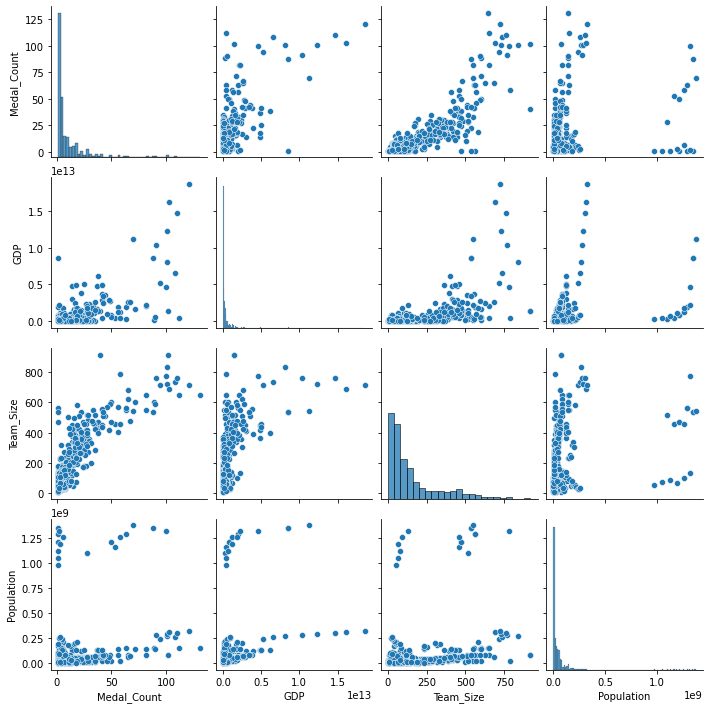

In [27]:
sns.pairplot(train,vars=['Medal_Count','GDP','Team_Size','Population'])

In [28]:
train['Log_GDP'] = train['GDP'].apply(np.log)
train['Log_Population'] = train['Population'].apply(np.log)
train['Log_GDP_PC'] = train['Log_GDP'] - train['Log_Population']

Text(22.7, 115, 'Correlation = 0.5433981859859442')

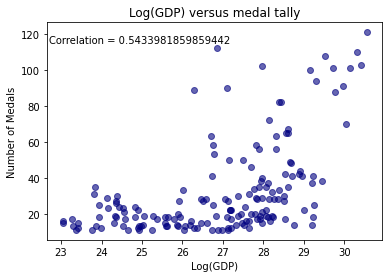

In [29]:
corr = train.loc[train['Medal_Count']>10.0,['Log_GDP', 'Medal_Count']].corr()['Medal_Count'][0]

plt.plot(train.loc[train['Medal_Count']>10.0,  'Log_GDP'], 
     train.loc[train['Medal_Count']>10.0,  'Medal_Count'] , 
     linestyle = 'none', 
     marker = 'o',
    color = 'navy',
    alpha = 0.6)
plt.xlabel('Log(GDP)')
plt.ylabel('Number of Medals')
plt.title('Log(GDP) versus medal tally')
plt.text(22.7, 
     115,
     "Correlation = " + str(corr))

Text(14.8, 120, 'Correlation = 0.6193822903787463')

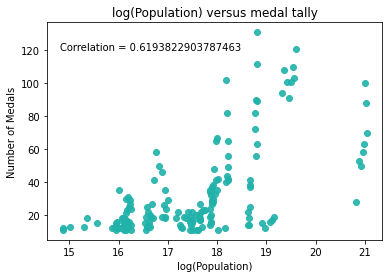

In [30]:
corr = train.loc[train['Medal_Count']>10.0,['Log_Population', 'Medal_Count']].corr()['Medal_Count'][0]

plt.plot(train.loc[train['Medal_Count']>10.0,  'Log_Population'], 
     train.loc[train['Medal_Count']>10.0,  'Medal_Count'] , 
     linestyle = 'none', 
     marker = 'o',
    color = 'lightseagreen',
    alpha = 0.9)
plt.xlabel('log(Population)')
plt.ylabel('Number of Medals')
plt.title('log(Population) versus medal tally')
plt.text(14.8, 
     120,
     "Correlation = " + str(corr))

Text(5.8, 117, 'Correlation = 0.14499014052916906')

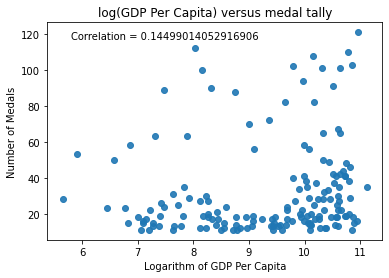

In [31]:
corr = train.loc[train['Medal_Count']>10.0,['Log_GDP_PC', 'Medal_Count']].corr()['Medal_Count'][0]

plt.plot(train.loc[train['Medal_Count']>10.0,  'Log_GDP_PC'], 
     train.loc[train['Medal_Count']>10.0,  'Medal_Count'] , 
     linestyle = 'none', 
     marker = 'o',
    alpha = 0.9)
plt.xlabel('Logarithm of GDP Per Capita')
plt.ylabel('Number of Medals')
plt.title('log(GDP Per Capita) versus medal tally')
plt.text(5.8, 
     117,
     "Correlation = " + str(corr))

Text(50, 120, 'Correlation = 0.7828668289196824')

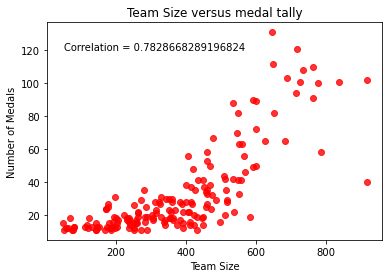

In [32]:
corr = train.loc[train['Medal_Count']>10.0,['Team_Size', 'Medal_Count']].corr()['Medal_Count'][0]

plt.plot(train.loc[train['Medal_Count']>10.0,  'Team_Size'], 
     train.loc[train['Medal_Count']>10.0,  'Medal_Count'] , 
     linestyle = 'none', 
     marker = 'o',
         color='r',
    alpha = 0.8)
plt.xlabel('Team Size')
plt.ylabel('Number of Medals')
plt.title('Team Size versus medal tally')
plt.text(50,120,
     "Correlation = " + str(corr))

In [33]:
#train models on data upto 2012
X_tr = train.loc[train.Year != 2016].dropna()[['Team_Size','Log_GDP','Log_Population']]
y_tr = train.loc[train.Year != 2016].dropna()['Medal_Count']
#predict on 2016
X_tst = train.loc[train.Year == 2016].dropna()[['Team_Size','Log_GDP','Log_Population']]
y_tst = train.loc[train.Year == 2016].dropna()['Medal_Count']

In [34]:
lr = LinearRegression()
lr.fit(X_tr,y_tr)
y_pred = lr.predict(X_tst)

lr_score = lr.score(X_tst,y_tst) #this gives the R^2 score
lr_err = np.sqrt(mse(y_tst,y_pred)) #this gives the rms error

print('Linear Regression R^2: {}, Linear Regression RMSE: {}'.format(lr_score,lr_err))

Linear Regression R^2: 0.6889941217008613, Linear Regression RMSE: 10.809899949900524


In [35]:
OLS = smf.ols('Medal_Count ~ Team_Size + Log_GDP + Log_Population', data=train.loc[train.Year!=2016]).fit()

y_ols = OLS.predict(X_tst)
ols_score = OLS.rsquared #R^2
ols_err = np.sqrt(mse(y_tst, y_ols)) #rms error
print('Statsmodels OLS R^2: {}, Statsmodels OLS RMSE: {}'.format(ols_score,ols_err))

Statsmodels OLS R^2: 0.7365664804407976, Statsmodels OLS RMSE: 10.809899949900528
